In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
X = seoul_bike_sharing_demand.data.features 
y = seoul_bike_sharing_demand.data.targets 
 
# variable information 
X


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [8]:
# Analyzing average rented bike counts for different times of the day
morning = X[(X['Hour'] >= 6) & (X['Hour'] < 12)]
afternoon = X[(X['Hour'] >= 12) & (X['Hour'] < 18)]
evening = X[(X['Hour'] >= 18) & (X['Hour'] < 24)]
night = X[(X['Hour'] >= 0) & (X['Hour'] < 6)]

avg_morning = np.mean(morning['Rented Bike Count'])
avg_afternoon = np.mean(afternoon['Rented Bike Count']) 
avg_evening = np.mean(evening['Rented Bike Count'])
avg_night = np.mean(night['Rented Bike Count'])


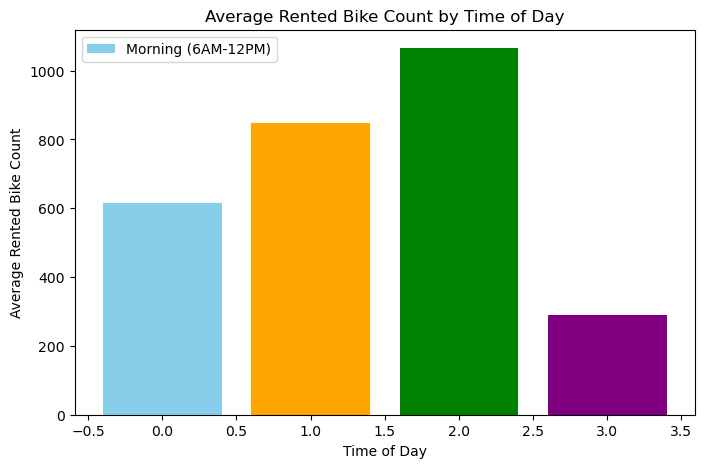

In [9]:
# Plotting the average rented bike counts for different times of the day
plt.figure(figsize=(8, 5))
plot_data = [avg_morning, avg_afternoon, avg_evening, avg_night]

plt.bar(range(len(plot_data)), plot_data, color=['skyblue', 'orange', 'green', 'purple'])
labels = ['Morning (6AM-12PM)', 'Afternoon (12PM-6PM)', 'Evening (6PM-12AM)', 'Night (12AM-6AM)']
plt.title('Average Rented Bike Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Rented Bike Count')
plt.legend(labels)
plt.show()

In [10]:
X

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [ ]:
# Modeling with Time Series Cross-Validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# One-hot encode categorical features
categorical = ['Seasons','Holiday']  # match dataframe column names
numeric = ['Hour','Temperature','Humidity', 'Wind speed', 'Visibility', 
           'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

X = X.sort_values('Date')  # ensure time order
A = X[['Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday', 'Seasons']]
B = X['Rented Bike Count']

tscv = TimeSeriesSplit(n_splits=10)
maes = []

for train_idx, test_idx in tscv.split(A):
    A_train, A_test = A.iloc[train_idx], A.iloc[test_idx]
    B_train, B_test = B.iloc[train_idx], B.iloc[test_idx]
    model.fit(A_train, B_train)
    B_pred = model.predict(A_test)
    mae = mean_absolute_error(B_test, B_pred)
    print("MAE:", mae)
    maes.append(mae)

print("MAE per fold:", maes)
print("Average MAE:", np.mean(maes))

MAE: 225.3926193467337
MAE: 185.07054648241208
MAE: 246.02222989949746
MAE: 194.70010050251253
MAE: 190.89695351758795
MAE: 178.3254836683417
MAE: 239.33484296482413
MAE: 208.82511934673366
MAE: 189.34074748743717
MAE: 211.0466959798995
MAE per fold: [225.3926193467337, 185.07054648241208, 246.02222989949746, 194.70010050251253, 190.89695351758795, 178.3254836683417, 239.33484296482413, 208.82511934673366, 189.34074748743717, 211.0466959798995]
Average MAE: 206.895533919598


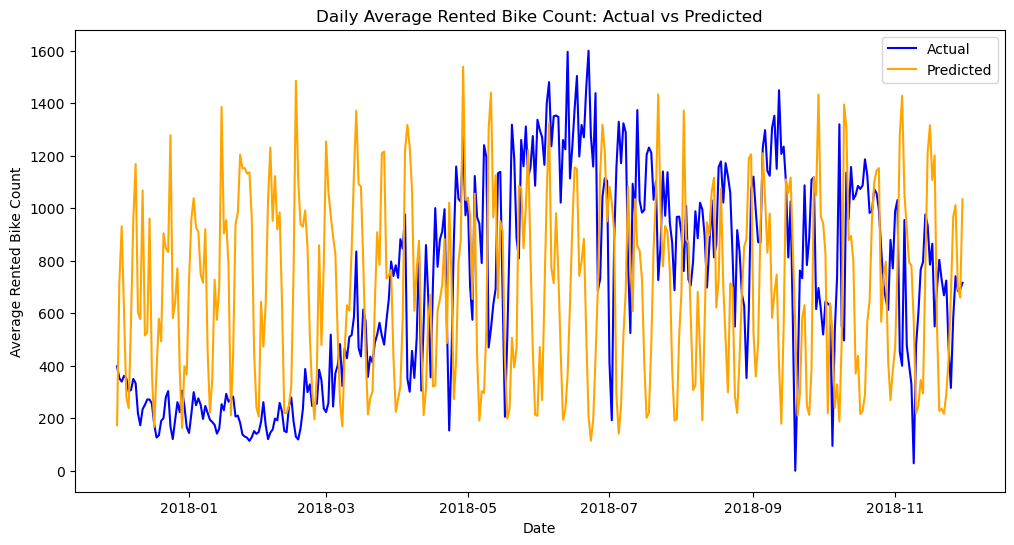

In [ ]:
# Plotting actual vs predicted bike counts
X = X.sort_values('Date')  # ensure time order

model.fit(A, B)
B_pred = model.predict(A)

X['Predicted Bike Count'] = B_pred
X['Rented_smooth'] = X['Rented Bike Count'].rolling(24).mean()
X['Predicted_smooth'] = X['Predicted Bike Count'].rolling(24).mean()

X['Date'] = pd.to_datetime(X['Date'], dayfirst=True)
daily_avg = X.groupby('Date')[['Rented_smooth', 'Predicted_smooth']].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Rented_smooth'], label='Actual', color='blue')
plt.plot(daily_avg.index, daily_avg['Predicted_smooth'], label='Predicted', color='orange')
plt.title('Daily Average Rented Bike Count: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Average Rented Bike Count')
plt.legend()
plt.show()